# Detecting Alzheimer's in Elderly Patients budget ass code 💀

In [28]:
#importing relevant libraries, add more if needed
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [29]:
#reading the dataset
path = Path("oasis_longitudinal_demographics_data.csv")
df = pd.read_csv(path)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'oasis_longitudinal_demographics_data.csv'

# Data Exploration
*Exploring the entire dataset before preprocessing*

Data variables:
- `Subject ID`: ID of the subject
- `MRI ID`: ID used for the MRI image (not using since we cant get that to work because god hates me)
- `Group`: If the person had alzheimers **CLASSIFICATION VARIABLE**
- `Visit`: The visit number of the patient 
- `MR Delay`: something idk man
- `M/F`: gender
- `Hand`: hand dominance **(not using cause the distribution is too biased)**
- `Age`: age
- `EDUC`: education levels
- `SES`: socieconomic status
- `MMSE`: mini mental state examination
- `CDR`: clinical dementia rating
- `eTIV`: estimated total intracranial volume
- `nWBV`: normalize whole brain volume
- `ASF`: atlas scaling factor

In [ ]:
#hand values are all right handed so we are not using that
df.Hand.value_counts()

,count
Hand,
R,373



NOTE: When analysing, ig use `df_copy` instead of `df` since i replaced *Converted* with *Demented* to allow binary classification

* Demented is group 0
* Nondemented is group 1
---






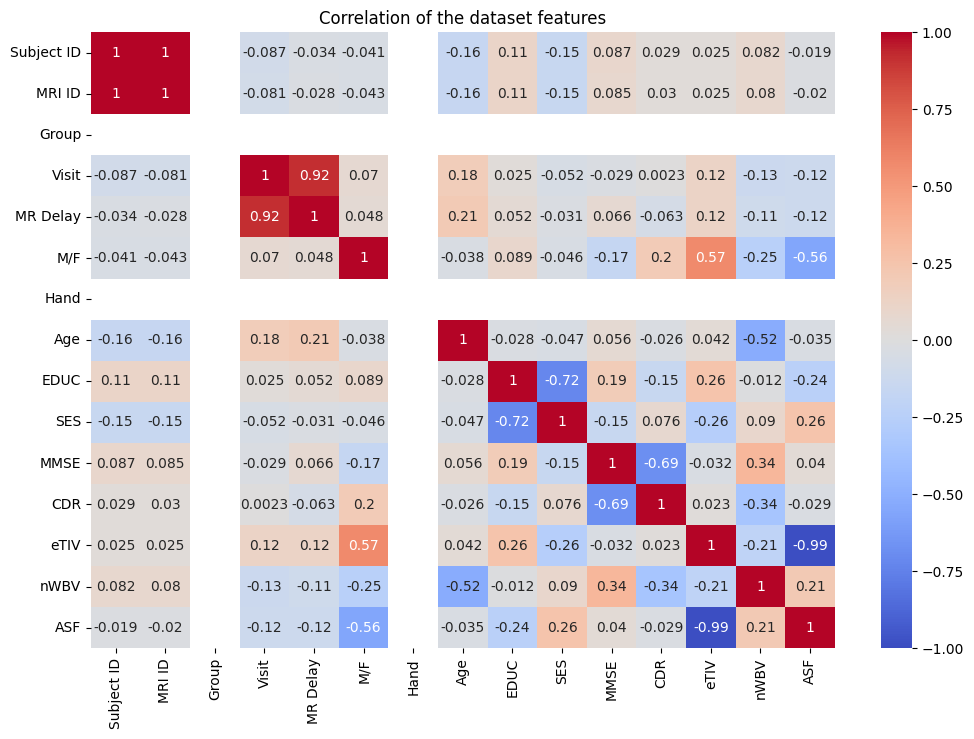

In [23]:
#preparing the correlation matrix for the dataset
encoder = LabelEncoder()

#replacing the "Converted" value into "Demented" to allow binary classification
df_copy = df.copy()
df_copy['Group'] = df_copy['Group'].replace({'Converted': 'Demented'})
# print(df_copy['Group'].value_counts())
df_copy['Group'] = encoder.fit_transform(df_copy['Group'])
# display(df_copy)


#creating the correlation
df_corr = df_copy.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_corr.corr()

#displaying the correlation
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of the dataset features')
plt.show()

From the correlation matrix, we discovered that the `MMSE` and `nWBV` variables maintains a positive correlation to the class variable, highlighting their impact towards the classification

In [ ]:
print(encoder.classes_)

['Demented' 'Nondemented']


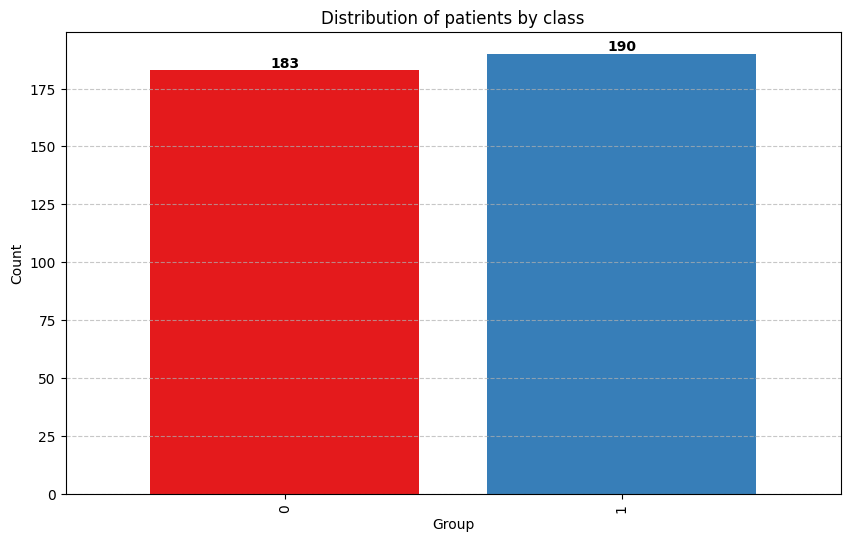

In [ ]:
classes = df_copy.Group.value_counts(ascending=True)

ax = classes.plot(kind='bar', figsize=(10, 6), color=plt.cm.Set1.colors, width=0.8)

for p in ax.patches:
  ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Group")
plt.ylabel("Count")
plt.title("Distribution of patients by class")
plt.grid(axis='y', linestyle='--', alpha=0.7)

The class distribution is fairly balanced so idk if we need to balance it more or not using SMOTE.

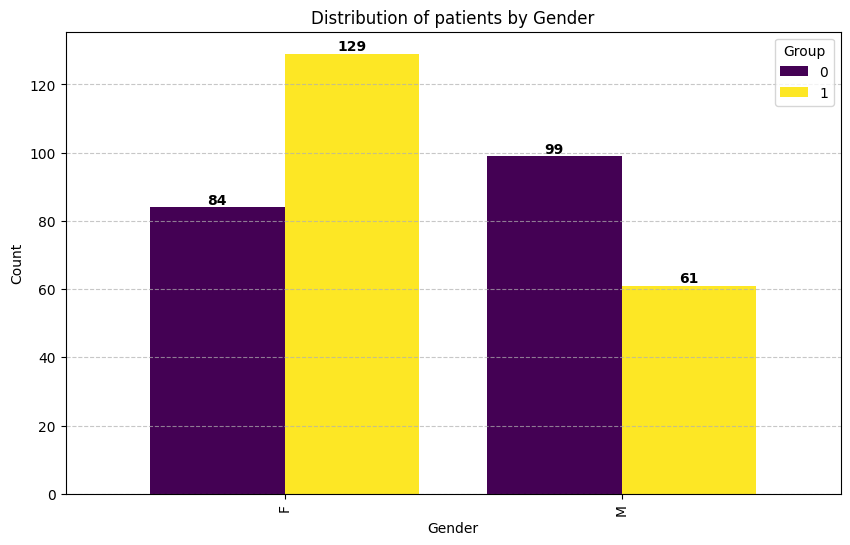

In [ ]:
#bar chart of the gender based on group
#NOTE: we're gonna have to merge "Converted" with "Demented" when classifying, i started doing it in the preprocessing section.
#ps, i merged them here on a COPY of the dataset.
gender_counts = df_copy.groupby(['M/F', 'Group']).size().unstack()

ax = gender_counts.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)

for p in ax.patches:
  ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of patients by Gender")
plt.legend(title="Group")
plt.grid(axis='y', linestyle='--', alpha=0.7)

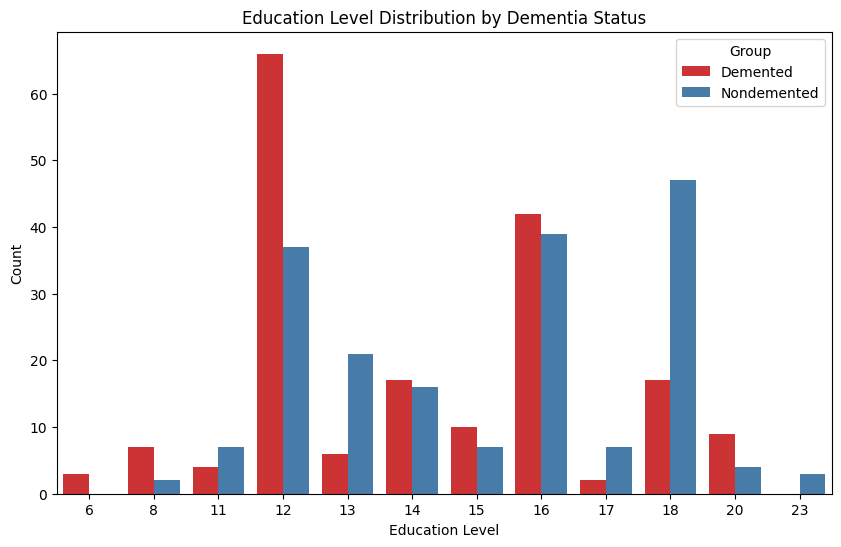

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy, x='EDUC', hue='Group', palette='Set1')
plt.title('Education Level Distribution by Dementia Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Group', labels = ["Demented", "Nondemented"])
plt.show()

* Large majority of Demented individuals recieved level 12 education
* At level 20, Nondemened count is slightly higher, could suggest higher education does not directly correlate to protection against Dementia



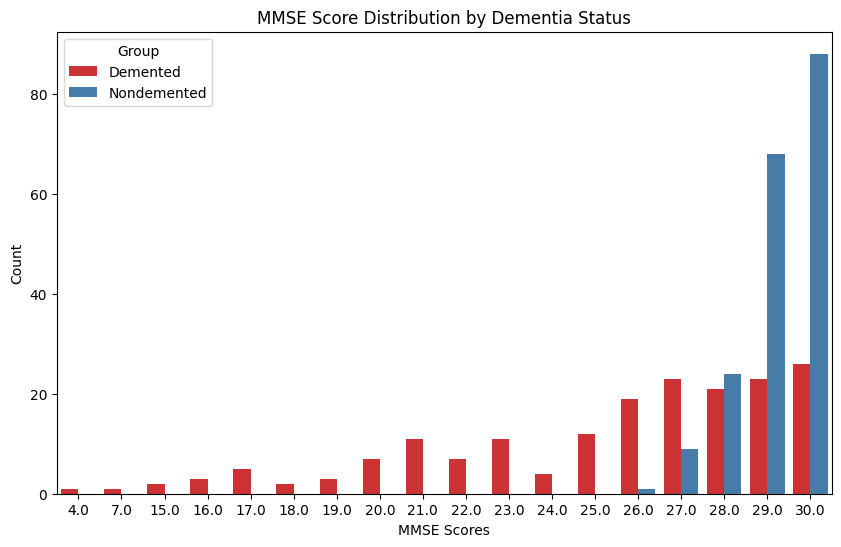

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy, x='MMSE', hue='Group', palette='Set1')
plt.title('MMSE Score Distribution by Dementia Status')
plt.xlabel('MMSE Scores')
plt.ylabel('Count')
plt.legend(title='Group', labels = ["Demented", "Nondemented"])
plt.show()

MMSE (Mini Mental State Examination) : Used to assess cognitive function, often used to screen for cognitive impairments; higher is better.
* Nondemented people generally have higher MMSE scores
* Much wider spread for the Demented

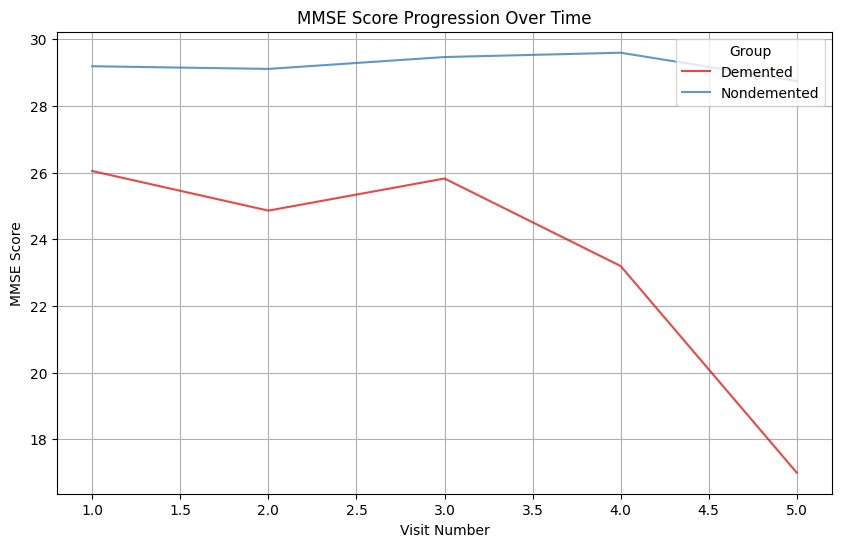

In [ ]:
data_sorted = df_copy[['Subject ID', 'Group', 'Visit', 'MMSE']].sort_values(by=['Subject ID', 'Visit'])

plt.figure(figsize=(10, 6))
sns.lineplot(x='Visit', y='MMSE', hue='Group', data=data_sorted, errorbar=None, alpha=0.8, palette='Set1')
plt.title('MMSE Score Progression Over Time')
plt.xlabel('Visit Number')
plt.ylabel('MMSE Score')
plt.legend(title='Group', loc='upper right', labels = ["Demented", "Nondemented"])
plt.grid(True)
plt.show()

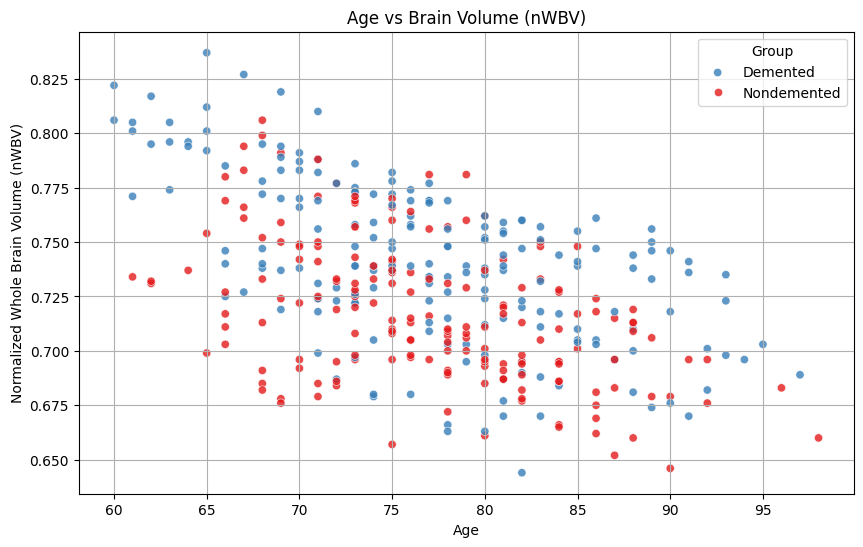

In [ ]:
data_sorted = df_copy[['Age', 'Group', 'nWBV']]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='nWBV', hue='Group', data=data_sorted, alpha=0.8, palette='Set1')
plt.title('Age vs Brain Volume (nWBV)')
plt.xlabel('Age')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.legend(title='Group', loc='upper right', labels = ["Demented", "Nondemented"])
plt.grid(True)
plt.show()

# Data Preprocessing hf with that 👍

In [ ]:
#checking for missing values in the entire dataset
display(df[df.isna().any(axis=1)])

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,1,2,0,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,3,0,2,560,1,0,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,4,0,3,1895,1,0,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,4,10,0,1,0,1,0,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,4,11,0,3,518,1,0,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,4,12,0,4,1281,1,0,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,52,134,0,1,0,0,0,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,52,135,0,2,490,0,0,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,81,207,0,1,0,0,0,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,81,208,0,2,807,0,0,83,12,NaN,23.0,0.5,1484,0.750,1.183


In [15]:
encoder = LabelEncoder()
imputer = SimpleImputer(strategy="median")

df["Group"] = df["Group"].apply(lambda x: 1 if x == 'Nondemented' else 0)
df["Subject ID"] = encoder.fit_transform(df["Subject ID"])
df["MRI ID"] = encoder.fit_transform(df["MRI ID"])
df["M/F"] = encoder.fit_transform(df["M/F"])
df["Hand"] = encoder.fit_transform(df["Hand"])
display(df)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,1,0,2,457,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,2,0,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,3,0,2,560,1,0,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,4,0,3,1895,1,0,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,148,368,0,2,842,1,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,148,369,0,3,2297,1,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,149,370,0,1,0,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,149,371,0,2,763,0,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
#not using these variables, feel free to mess around and change them idk
df = df.drop(columns=["MRI ID", "Group", "Hand"])
display(df)

,Subject ID,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
#PLEASE CHANGE ME
#change converted to demented to allow binary classification. we are not doing multi classification.
df.loc[df['Group'] == "Converted"] = "Demented"

KeyError: 'Group'